<a href="https://colab.research.google.com/github/nadiaenh/Dysarthria-Classifier/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
# importing the dataset
url = 'https://raw.githubusercontent.com/cpappas18/Dysarthria-Classifier/main/PD_remove_std_all_datasets.csv'
df = pd.read_csv(url).iloc[: , 1:]
df.head()

,Status,Gender,MDVP:Jitter(%),MDVP:Jitter(Abs),Jitter:PPQ5,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,RPDE,DFA,PPE
0,1,0.0,0.164045,-0.198870,0.037180,0.424916,-0.403364,-0.425939,-0.304550,-0.488300,-0.591434,-0.304546,-1.089248,-1.523576,-0.607840
1,1,0.0,-0.493719,-0.673673,-0.424084,-0.458073,-0.582269,-0.615418,-0.589891,-0.610738,-0.580061,-0.589887,-0.939335,-1.297524,-0.871965
2,1,0.0,-0.164837,-0.455822,-0.263885,-0.216861,-0.697682,-0.607987,-0.756982,-0.728527,-0.677369,-0.756979,-0.684436,-1.583995,-0.353272
3,1,0.0,-0.079437,-0.399963,-0.109209,-0.263794,-0.488022,-0.065557,-0.517913,-0.511031,-0.464639,-0.518124,-0.450179,-1.115438,0.270084
4,1,0.0,-0.430123,-0.581505,-0.479325,-0.585774,-0.688422,-0.626564,-0.792329,-0.684614,-0.525299,-0.792540,-0.594208,-1.346606,-0.437298


In [51]:
# balancing the dataset (50/50 control and PD)
df = pd.concat([df[df['Status']==0], df[df['Status']==1].sample(n=(df['Status']==0).sum())])

In [52]:
# fitting the LogReg model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logReg = LogisticRegression(solver='lbfgs')
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# predicting the test set 
y_pred = logReg.predict(X_test)

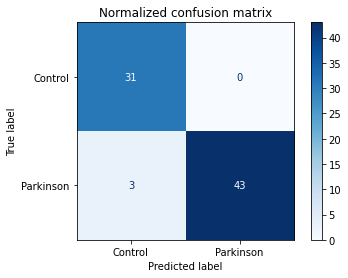

In [84]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(logReg, X_test, y_test, display_labels=['Control', 'Parkinson'], cmap=plt.cm.Blues)
disp.ax_.set_title(title)
plt.show()

In [85]:
# cross validation
from sklearn import model_selection
for k in range(2,30,4):
  kfold = model_selection.KFold(n_splits=k, shuffle=True)
  results = model_selection.cross_val_score(logReg, X_train, y_train, cv=kfold, scoring='accuracy')
  print("Accuracy: %.3f (%.f)" % (results.mean(), k))

Accuracy: 0.954 (2)
Accuracy: 0.954 (6)
Accuracy: 0.944 (10)
Accuracy: 0.945 (14)
Accuracy: 0.948 (18)
Accuracy: 0.944 (22)
Accuracy: 0.944 (26)


In [86]:
# log loss (closer to 0 is better)
for k in range(2,30,4):
  kfold = model_selection.KFold(n_splits=k, shuffle=True)
  results = model_selection.cross_val_score(logReg, X, y, cv=kfold, scoring='neg_log_loss')
  print("Logloss: %.3f (%.f)" % (results.mean(), k))

Logloss: -0.170 (2)
Logloss: -0.175 (6)
Logloss: -0.175 (10)
Logloss: -0.176 (14)
Logloss: -0.182 (18)
Logloss: -0.174 (22)
Logloss: -0.181 (26)


In [87]:
# AUC (1 is perfect predictions, 0.5 is as good as random)
for k in range(2,30,4):
  kfold = model_selection.KFold(n_splits=k, shuffle=True)
  results = model_selection.cross_val_score(logReg, X, y, cv=kfold, scoring='roc_auc')
  print("AUC: %.3f (%.f)" % (results.mean(), k))

AUC: 0.978 (2)
AUC: 0.978 (6)
AUC: 0.977 (10)
AUC: 0.979 (14)
AUC: 0.977 (18)
AUC: 0.977 (22)
AUC: 0.979 (26)


In [88]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# precision = for all instances classified positive, what percent was correct?
# recall = for all instances that were actually positive, what percent was classified correctly?
# f1 = weighted harmonic mean of precision and recall (1 is best, 0 is worst)
# support = number of actual occurrences of the class in the dataset

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       1.00      0.93      0.97        46

    accuracy                           0.96        77
   macro avg       0.96      0.97      0.96        77
weighted avg       0.96      0.96      0.96        77



0.9019247098782904


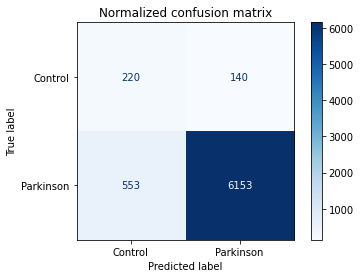

In [95]:
# testing on the median dataset 
url = 'https://raw.githubusercontent.com/cpappas18/Dysarthria-Classifier/main/PD_median_std_all_datasets.csv'
df_test = pd.read_csv(url).iloc[: , 1:]

X_new = df_test.iloc[: , 1:]
y_new = df_test.iloc[: , 0]
y_new_pred = logReg.predict(X_new)

print(logReg.score(X_new, y_new))

disp = plot_confusion_matrix(logReg, X_new, y_new, display_labels=['Control', 'Parkinson'], cmap=plt.cm.Blues, values_format='.0f')
disp.ax_.set_title(title)
plt.show()